In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv("heart.csv")

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
x=df.drop('target',axis=1)
y=df[['target']]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [11]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

In [14]:
ada_model.fit(x_train, y_train)

c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [15]:
y_pred = ada_model.predict(x_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8878048780487805


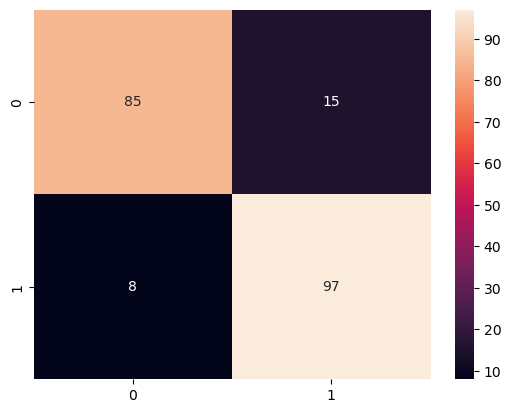

In [18]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.87      0.92      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1]
}

grid = GridSearchCV(
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)

c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters: {'learning_rate': 1, 'n_estimators': 150}


In [22]:
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=150,
    learning_rate=1.0,
    random_state=42
)

In [25]:
ada_model.fit(x_train, y_train)

c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=150, random_state=42)

In [26]:
y_pred = ada_model.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9121951219512195


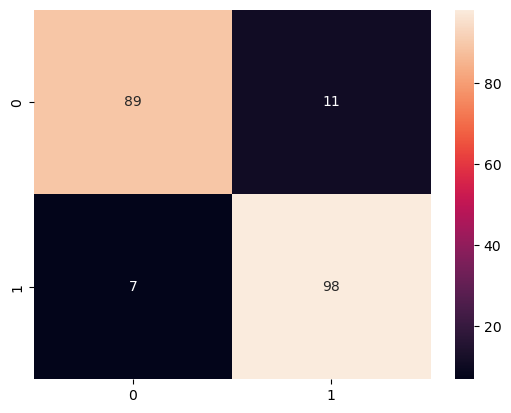

In [28]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.90      0.93      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [30]:
# New patient data (example)
new_data = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Scale the input (VERY IMPORTANT)
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = ada_model.predict(new_data_scaled)
probability = ada_model.predict_proba(new_data_scaled)

print("Prediction:", prediction)
print("Probability:", probability)


Prediction: [1]
Probability: [[0.46590261 0.53409739]]


c:\Users\husna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
